In [1]:
import pandas as pd
import json
from pathlib import Path

RACES = [
  "NH_BLACK",
  "NH_WHITE",
  "HISP",
  "NH_ASIAN",
  "NH_OTHER",
]

In [2]:

def summarize_election(
  election_path
):
  back_half = election_path.stem.split("samples_100")[1]
  _, plan, district, seat_count, cohesion, alpha = back_half.split("_")
  counts = {}
  with open(election_path, "r") as f:
    for line in f:
      election = json.loads(line)
      winners = election["winners"]
      for _winner in winners:
        winner = "_".join(_winner.split("_")[:-1])
        if winner not in counts:
          counts[winner] = 0
        counts[winner] += 1
  # divide each by number of runs
  for winner in counts:
    counts[winner] = counts[winner] / 100
  for race in RACES:
    if race not in counts:
      counts[race] = 0
  return {
    "plan": plan,
    "district": district,
    "seat_count": seat_count,
    "cohesion": cohesion,
    "alpha": alpha,
    **counts,
  }


In [3]:
DATA_DIR = Path("../data")
PLAN_DIR = DATA_DIR / "plan_results"

In [4]:
seats5_results = [*[
  z for z in PLAN_DIR.glob("stv_slate_pl_voters_1000_seats_5_samples_100_ca*.jsonl")
],
*[
  z for z in Path(PLAN_DIR / 'set2').glob("stv_slate_pl_voters_1000_seats_5_samples_100_ca*.jsonl")
]]


In [6]:
len(seats5_results)

360

In [11]:
output = []
for result_file in seats5_results:
  output.append(summarize_election(result_file))
df = pd.DataFrame(output)

In [12]:
df = df.drop(columns=["district", "seat_count"])
agg = df.groupby([
  "plan",
  "cohesion",
  "alpha",
]).sum().reset_index()

In [23]:
agg['PCT_NH_BLACK'] = agg['NH_BLACK'] / 50
agg['PCT_NH_WHITE'] = agg['NH_WHITE'] / 50
agg['PCT_HISP'] = agg['HISP'] / 50
agg['PCT_NH_ASIAN'] = agg['NH_ASIAN'] / 50
agg['PCT_NH_OTHER'] = agg['NH_OTHER'] / 50

In [24]:
agg

,plan,cohesion,alpha,NH_BLACK,NH_WHITE,HISP,NH_ASIAN,NH_OTHER,PCT_NH_BLACK,PCT_NH_WHITE,PCT_HISP,PCT_NH_ASIAN,PCT_NH_OTHER
0,ca10-1042,0.6,0.5,14.78,15.94,15.07,3.01,1.14,0.2956,0.3188,0.3014,0.0602,0.0228
1,ca10-1042,0.6,1,15.60,16.53,15.29,2.10,0.41,0.3120,0.3306,0.3058,0.0420,0.0082
2,ca10-1042,0.6,2,16.25,16.60,15.57,1.42,0.08,0.3250,0.3320,0.3114,0.0284,0.0016
3,ca10-1042,0.9,0.5,17.18,16.49,15.64,0.63,0.00,0.3436,0.3298,0.3128,0.0126,0.0000
4,ca10-1042,0.9,1,17.17,16.41,15.79,0.57,0.00,0.3434,0.3282,0.3158,0.0114,0.0000
5,ca10-1042,0.9,2,17.39,16.63,15.64,0.28,0.00,0.3478,0.3326,0.3128,0.0056,0.0000
6,ca10-25218,0.6,0.5,15.71,15.30,14.91,3.10,0.97,0.3142,0.3060,0.2982,0.0620,0.0194
7,ca10-25218,0.6,1,16.00,16.21,14.92,2.27,0.52,0.3200,0.3242,0.2984,0.0454,0.0104
8,ca10-25218,0.6,2,16.71,16.58,14.76,1.61,0.20,0.3342,0.3316,0.2952,0.0322,0.0040
9,ca10-25218,0.9,0.5,16.98,17.74,14.37,0.84,0.02,0.3396,0.3548,0.2874,0.0168,0.0004


<Axes: >

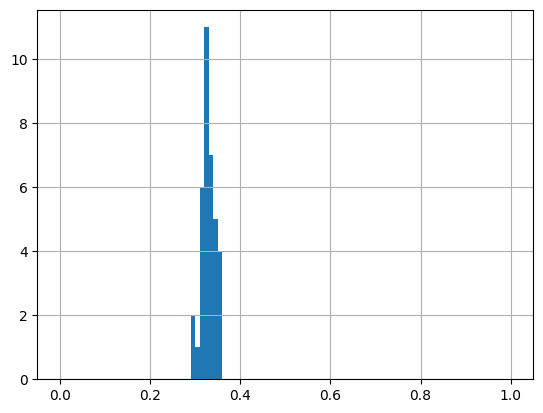

In [25]:
agg.PCT_NH_BLACK.hist(range=(0, 1), bins=100)

<Axes: >

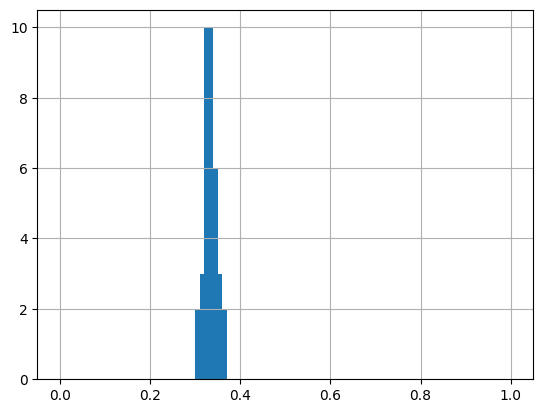

In [26]:
agg.PCT_NH_WHITE.hist(range=(0, 1), bins=100)

<Axes: >

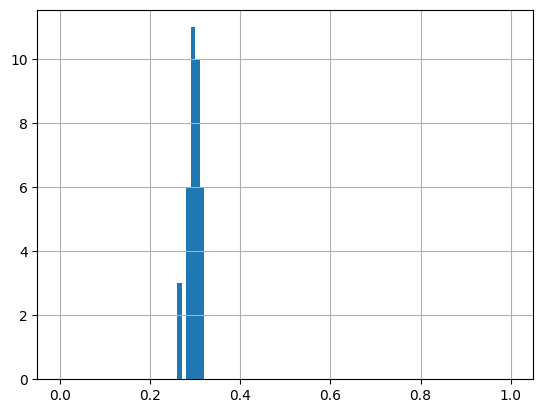

In [27]:
agg.PCT_HISP.hist(range=(0, 1), bins=100)

In [28]:
print("MAX HISP", agg['PCT_HISP'].max())
print("MAX NH_BLACK", agg['PCT_NH_BLACK'].max())
print("MAX NH_WHITE", agg['PCT_NH_WHITE'].max())
print("MAX NH_ASIAN", agg['PCT_NH_ASIAN'].max())
print("MAX NH_OTHER", agg['PCT_NH_OTHER'].max())
print("")
print("MIN HISP", agg['PCT_HISP'].min())
print("MIN NH_BLACK", agg['PCT_NH_BLACK'].min())
print("MIN NH_WHITE", agg['PCT_NH_WHITE'].min())
print("MIN NH_ASIAN", agg['PCT_NH_ASIAN'].min())
print("MIN NH_OTHER", agg['PCT_NH_OTHER'].min())
print("")
print("MEAN HISP", agg['PCT_HISP'].mean())
print("MEAN NH_BLACK", agg['PCT_NH_BLACK'].mean())
print("MEAN NH_WHITE", agg['PCT_NH_WHITE'].mean())
print("MEAN NH_ASIAN", agg['PCT_NH_ASIAN'].mean())

MAX HISP 0.31579999999999997
MAX NH_BLACK 0.3554
MAX NH_WHITE 0.3678
MAX NH_ASIAN 0.0674
MAX NH_OTHER 0.022799999999999997

MIN HISP 0.2652
MIN NH_BLACK 0.2956
MIN NH_WHITE 0.306
MIN NH_ASIAN 0.005600000000000001
MIN NH_OTHER 0.0

MEAN HISP 0.29702222222222224
MEAN NH_BLACK 0.3282333333333333
MEAN NH_WHITE 0.33414999999999995
MEAN NH_ASIAN 0.033988888888888895
